# Reinforcement Learning for Portfolio Allocation

In this case study, similar to Case Study 1 of this chapter, we will use the Reinforcement Learning models to come up with a policy for optimal portfolio allocation among a set of cryptocurrencies.


## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4.Evaluate Algorithms and Models](#4)        
    * [4.1. Defining the Environment](#4.1)
    * [4.2. Agent Script](#4.2)
    * [4.3. Training the model](#4.3)       
* [5.Testing the Model](#5)           

<a id='0'></a>
# 1. Problem Definition

In the reinforcement learning based framework defined for this problem,  the algorithm determines the optimal portfolio allocation depending upon the current state of the portfolio of instruments.

The algorithm is trained using Deep QLearning framework and the components of the reinforcement learning environment are:

* Agent: Portfolio manager, robo advisor or an individual.
* Action: Assignment and rebalancing the portfolio weights. The DQN model provides the Q-values which is further converted into portfolio weights.

* Reward function: Sharpe ratio, which consists of the standard deviation as the risk assessment measure is used reward function.

* State: The state is the correlation matrix of the instruments based on a specific time window. The correlation matrix is a suitable state variable for the portfolio allocation, as it contains the information about the relationships between different instruments and can be useful in performing portfolio allocation.

* Environment: Cryptocurrency exchange.


The data of cryptocurrencies that we will be using for this case study is obtained from
the Kaggle platform and contains the daily prices of the cryptocurrencies during the
period of 2018. The data contains some of the most liquid cryptocurrencies such as
Bitcoin, Ethereum, Ripple, Litecoin and Dash.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [5]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random

from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model
from keras.regularizers import l2

import numpy as np
import pandas as pd

import random
from collections import deque
import matplotlib.pylab as plt

In [6]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='1.2'></a>
## 2.2. Loading the Data

🚀 CSV 결측값 처리 프로그램
📋 사용 가능한 처리 방법:
1. smart: 스마트 처리 (추천) - 컬럼별 특성에 맞는 최적 처리
2. dropna: 완전 제거 - NaN이 있는 모든 행 삭제
3. ffill: Forward Fill - 이전 값으로 채우기
4. interpolate: 선형 보간법 - 수치적 추정
5. mean_fill: 평균값 대체 - 평균/최빈값으로 채우기
📁 파일 읽는 중: file.csv
✅ 파일 로드 완료!
원본 데이터 크기: (5179, 11)
=== file.csv 데이터 결측값 분석 ===
데이터 크기: (5179, 11)
전체 셀 개수: 56969
결측값 개수: 2535
결측값 비율: 4.45%

--- 컬럼별 결측값 현황 ---
     Missing_Count  Missing_Percentage Data_Type
IGF            771           14.887044   float64
VEA            674           13.014095   float64
HYG            600           11.585248   float64
DJP            490            9.461286   float64


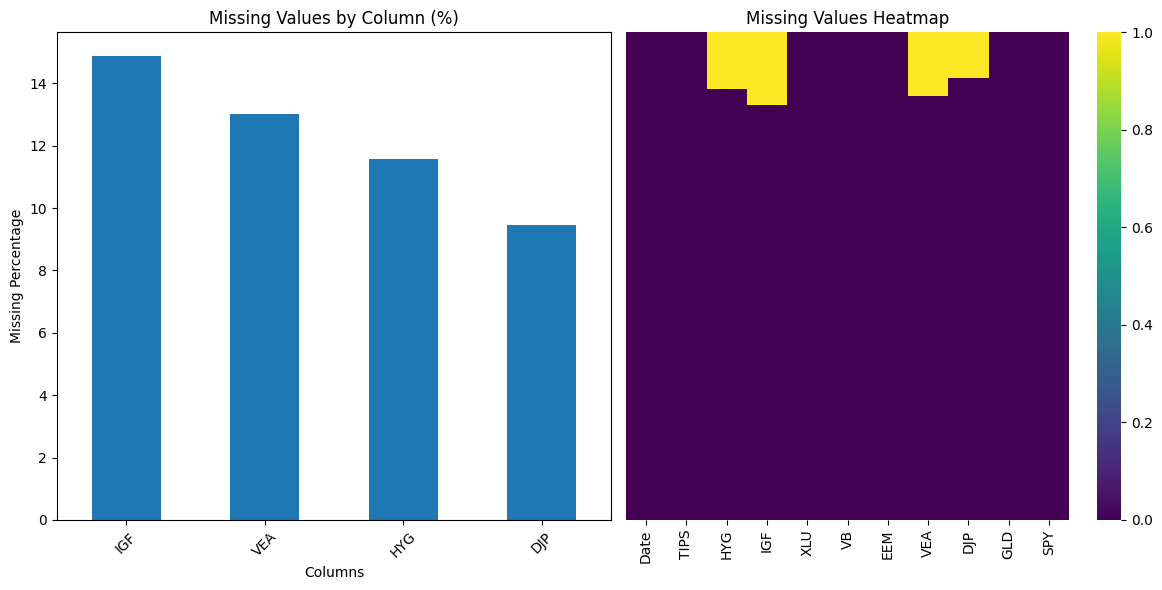


🔧 결측값 처리 방법: dropna
✅ 모든 결측값이 있는 행을 제거했습니다.

📊 처리 결과:
원본 데이터 크기: (5179, 11)
정제된 데이터 크기: (4408, 11)
제거된 행 수: 771
제거된 열 수: 0
남은 결측값: 0
✅ 정제된 데이터가 저장되었습니다: cleaned_data_dropna_20250622_133845.csv


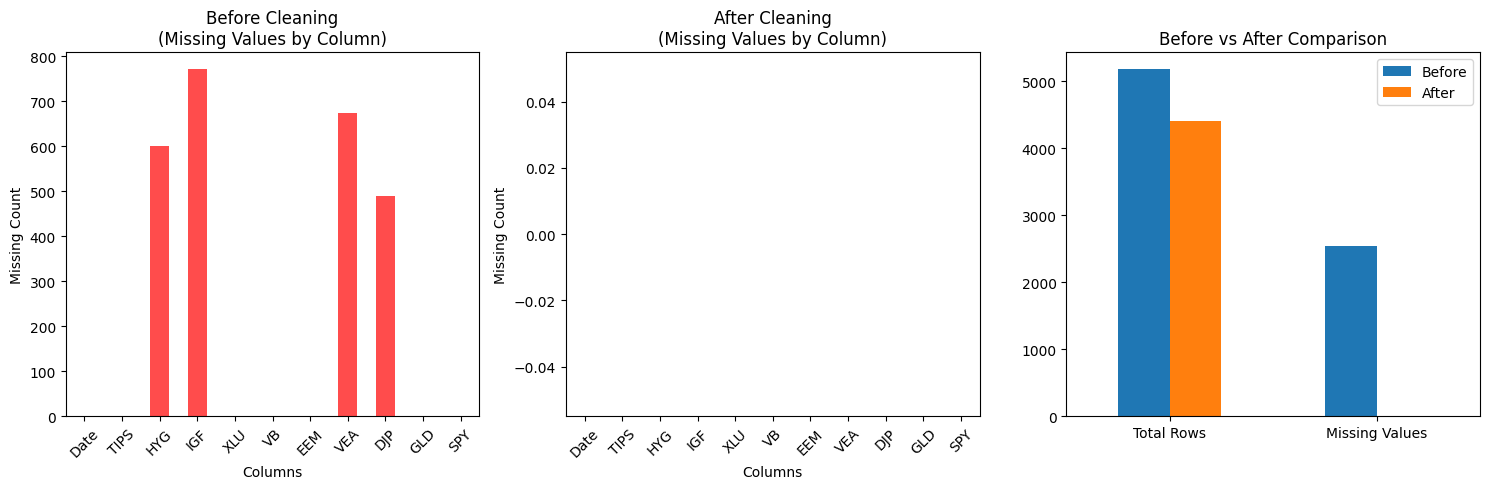


🎉 처리 완료! 정제된 데이터가 'cleaned_data_dropna_20250622_133845.csv'에 저장되었습니다.

📋 정제된 데이터 미리보기:
           Date    TIPS        HYG        IGF        XLU         VB  \
771  2007-12-12  0.0003  34.380821  28.216949  23.353336  53.280838   
772  2007-12-13  0.0003  34.363964  28.239519  23.698032  53.128227   
773  2007-12-14  0.0003  34.414520  28.279016  23.256386  52.151443   
774  2007-12-17  0.0003  34.229050  27.855844  23.040945  51.311977   
775  2007-12-18  0.0001  34.262806  27.658360  23.245611  51.953018   

           EEM        VEA        DJP        GLD         SPY  
771  35.924168  29.437624  55.610001  80.489998  107.003113  
772  34.936775  28.939762  54.970001  78.500000  106.781052  
773  34.104084  28.158220  54.959999  78.519997  105.427109  
774  32.650284  27.550365  54.669998  78.129997  103.922745  
775  33.546684  27.851400  54.750000  79.250000  104.502998  

📊 최종 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 4408 entries, 771 to 5178
Data columns (total 11 colum

In [1]:
# @title 결측값
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def analyze_missing_values(df, filename="data"):
    """
    결측값 현황 분석 및 시각화
    """
    print(f"=== {filename} 데이터 결측값 분석 ===")
    print(f"데이터 크기: {df.shape}")
    print(f"전체 셀 개수: {df.size}")
    print(f"결측값 개수: {df.isnull().sum().sum()}")
    print(f"결측값 비율: {df.isnull().sum().sum() / df.size * 100:.2f}%")

    print("\n--- 컬럼별 결측값 현황 ---")
    missing_info = pd.DataFrame({
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': df.isnull().sum() / len(df) * 100,
        'Data_Type': df.dtypes
    })
    missing_info = missing_info[missing_info['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    print(missing_info)

    # 결측값 분포 시각화
    if len(missing_info) > 0:
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        missing_info['Missing_Percentage'].plot(kind='bar')
        plt.title('Missing Values by Column (%)')
        plt.xlabel('Columns')
        plt.ylabel('Missing Percentage')
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
        plt.title('Missing Values Heatmap')

        plt.tight_layout()
        plt.show()

    return missing_info

def clean_csv_data(input_file, output_file=None, method='smart', threshold=0.5):
    """
    CSV 파일의 결측값을 처리하여 저장

    Parameters:
    input_file: str - 입력 CSV 파일 경로
    output_file: str - 출력 CSV 파일 경로 (None이면 자동 생성)
    method: str - 처리 방법 ('dropna', 'smart', 'ffill', 'interpolate', 'mean_fill')
    threshold: float - 유지할 데이터의 최소 비율 (0.5 = 50% 이상 데이터가 있어야 유지)
    """

    try:
        # 1. 데이터 읽기
        print(f"📁 파일 읽는 중: {input_file}")
        df = pd.read_csv(input_file)

        print(f"✅ 파일 로드 완료!")
        print(f"원본 데이터 크기: {df.shape}")

        # 2. 결측값 분석
        missing_info = analyze_missing_values(df, input_file)

        # 3. 데이터 백업
        df_original = df.copy()

        # 4. 결측값 처리
        print(f"\n🔧 결측값 처리 방법: {method}")

        if method == 'dropna':
            # 모든 NaN 행 제거
            df_cleaned = df.dropna()
            print("✅ 모든 결측값이 있는 행을 제거했습니다.")

        elif method == 'smart':
            # 스마트 처리: 단계별 정제
            print("🧠 스마트 처리 시작...")

            # Step 1: 결측값 비율이 높은 컬럼 제거
            high_missing_cols = missing_info[missing_info['Missing_Percentage'] > threshold * 100].index
            if len(high_missing_cols) > 0:
                df = df.drop(columns=high_missing_cols)
                print(f"   - 결측값이 {threshold*100}% 이상인 컬럼 제거: {list(high_missing_cols)}")

            # Step 2: 날짜 컬럼 감지 및 처리
            date_columns = []
            for col in df.columns:
                if df[col].dtype == 'object':
                    try:
                        pd.to_datetime(df[col].dropna().head(10))
                        date_columns.append(col)
                    except:
                        pass

            if date_columns:
                print(f"   - 감지된 날짜 컬럼: {date_columns}")
                for col in date_columns:
                    df[col] = pd.to_datetime(df[col], errors='coerce')

            # Step 3: 숫자형 컬럼은 forward fill, 범주형은 최빈값
            df_cleaned = df.copy()
            for col in df_cleaned.columns:
                if df_cleaned[col].dtype in ['float64', 'int64']:
                    # 숫자형: forward fill 후 평균값으로 채우기
                    df_cleaned[col] = df_cleaned[col].fillna(method='ffill')
                    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())
                else:
                    # 범주형: 최빈값으로 채우기
                    mode_value = df_cleaned[col].mode()
                    if len(mode_value) > 0:
                        df_cleaned[col] = df_cleaned[col].fillna(mode_value[0])

            print("✅ 스마트 처리 완료!")

        elif method == 'ffill':
            # Forward fill 후 backward fill
            df_cleaned = df.fillna(method='ffill').fillna(method='bfill')
            print("✅ Forward fill로 결측값을 처리했습니다.")

        elif method == 'interpolate':
            # 선형 보간법
            df_cleaned = df.copy()
            numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
            df_cleaned[numeric_columns] = df_cleaned[numeric_columns].interpolate(method='linear')
            df_cleaned = df_cleaned.fillna(method='ffill').fillna(method='bfill')
            print("✅ 선형 보간법으로 결측값을 처리했습니다.")

        elif method == 'mean_fill':
            # 평균값/최빈값으로 채우기
            df_cleaned = df.copy()
            for col in df_cleaned.columns:
                if df_cleaned[col].dtype in ['float64', 'int64']:
                    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())
                else:
                    mode_value = df_cleaned[col].mode()
                    if len(mode_value) > 0:
                        df_cleaned[col] = df_cleaned[col].fillna(mode_value[0])
            print("✅ 평균값/최빈값으로 결측값을 처리했습니다.")

        # 5. 처리 결과 요약
        print(f"\n📊 처리 결과:")
        print(f"원본 데이터 크기: {df_original.shape}")
        print(f"정제된 데이터 크기: {df_cleaned.shape}")
        print(f"제거된 행 수: {len(df_original) - len(df_cleaned)}")
        print(f"제거된 열 수: {df_original.shape[1] - df_cleaned.shape[1]}")
        print(f"남은 결측값: {df_cleaned.isnull().sum().sum()}")

        # 6. 파일 저장
        if output_file is None:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            output_file = f"cleaned_data_{method}_{timestamp}.csv"

        df_cleaned.to_csv(output_file, index=False, encoding='utf-8-sig')
        print(f"✅ 정제된 데이터가 저장되었습니다: {output_file}")

        # 7. 처리 전후 비교 시각화
        if missing_info is not None and len(missing_info) > 0:
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            df_original.isnull().sum().plot(kind='bar', color='red', alpha=0.7)
            plt.title('Before Cleaning\n(Missing Values by Column)')
            plt.xlabel('Columns')
            plt.ylabel('Missing Count')
            plt.xticks(rotation=45)

            plt.subplot(1, 3, 2)
            df_cleaned.isnull().sum().plot(kind='bar', color='green', alpha=0.7)
            plt.title('After Cleaning\n(Missing Values by Column)')
            plt.xlabel('Columns')
            plt.ylabel('Missing Count')
            plt.xticks(rotation=45)

            plt.subplot(1, 3, 3)
            comparison_data = pd.DataFrame({
                'Before': [len(df_original), df_original.isnull().sum().sum()],
                'After': [len(df_cleaned), df_cleaned.isnull().sum().sum()]
            }, index=['Total Rows', 'Missing Values'])
            comparison_data.plot(kind='bar', ax=plt.gca())
            plt.title('Before vs After Comparison')
            plt.xticks(rotation=0)

            plt.tight_layout()
            plt.show()

        return df_cleaned, output_file

    except FileNotFoundError:
        print(f"❌ 오류: 파일을 찾을 수 없습니다: {input_file}")
        return None, None
    except Exception as e:
        print(f"❌ 오류 발생: {str(e)}")
        return None, None

def batch_clean_csv_files(file_list, method='smart', threshold=0.5):
    """
    여러 CSV 파일을 일괄 처리

    Parameters:
    file_list: list - 처리할 CSV 파일 경로 리스트
    method: str - 처리 방법
    threshold: float - 유지할 데이터의 최소 비율
    """
    results = []

    for file_path in file_list:
        print(f"\n{'='*50}")
        print(f"처리 중: {file_path}")

        cleaned_df, output_file = clean_csv_data(file_path, method=method, threshold=threshold)

        if cleaned_df is not None:
            results.append({
                'input_file': file_path,
                'output_file': output_file,
                'original_shape': None,  # 이 정보는 함수 내에서 출력됨
                'cleaned_shape': cleaned_df.shape,
                'status': 'success'
            })
        else:
            results.append({
                'input_file': file_path,
                'output_file': None,
                'original_shape': None,
                'cleaned_shape': None,
                'status': 'failed'
            })

    # 결과 요약
    print(f"\n{'='*50}")
    print("📋 배치 처리 결과 요약:")
    for result in results:
        status_icon = "✅" if result['status'] == 'success' else "❌"
        print(f"{status_icon} {result['input_file']} -> {result['output_file']}")

    return results

# 사용 예시 및 메인 실행 부분
if __name__ == "__main__":
    print("🚀 CSV 결측값 처리 프로그램")
    print("=" * 50)

    # 단일 파일 처리 예시
    input_file = "file.csv"  # 여기에 실제 파일 경로를 입력하세요

    # 다양한 처리 방법 중 선택
    methods = ['smart', 'dropna', 'ffill', 'interpolate', 'mean_fill']

    print("📋 사용 가능한 처리 방법:")
    for i, method in enumerate(methods, 1):
        descriptions = {
            'smart': '스마트 처리 (추천) - 컬럼별 특성에 맞는 최적 처리',
            'dropna': '완전 제거 - NaN이 있는 모든 행 삭제',
            'ffill': 'Forward Fill - 이전 값으로 채우기',
            'interpolate': '선형 보간법 - 수치적 추정',
            'mean_fill': '평균값 대체 - 평균/최빈값으로 채우기'
        }
        print(f"{i}. {method}: {descriptions[method]}")

    # 실행 (기본값: smart 방법 사용)
    cleaned_data, output_path = clean_csv_data(
        input_file=input_file,
        method='dropna',  # 원하는 방법으로 변경
        threshold=1    # 70% 이상 데이터가 있는 컬럼만 유지
    )

    if cleaned_data is not None:
        print(f"\n🎉 처리 완료! 정제된 데이터가 '{output_path}'에 저장되었습니다.")

        # 처리된 데이터 미리보기
        print("\n📋 정제된 데이터 미리보기:")
        print(cleaned_data.head())
        print(f"\n📊 최종 데이터 정보:")
        print(cleaned_data.info())
    else:
        print("❌ 파일 처리에 실패했습니다.")

In [9]:
#The data already obtained from yahoo finance is imported.
csv_name = 'cleaned_data_dropna_20250622_133845.csv'
dataset = read_csv(csv_name, index_col=0)
asset_col = dataset.shape[1]

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [11]:
# shape
dataset.shape

(4408, 10)

In [12]:
asset_col

10

In [ ]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,ADA,BCH,BNB,BTC,DASH,EOS,ETH,IOT,LINK,LTC,TRX,USDT,XLM,XMR,XRP
Date,,,,,,,,,,,,,,,
2018-01-01,0.7022,2319.120117,8.480,13444.879883,1019.419983,7.64,756.200012,3.90,0.7199,224.339996,0.05078,1.01,0.4840,338.170013,2.05
2018-01-02,0.7620,2555.489990,8.749,14754.129883,1162.469971,8.30,861.969971,3.98,0.6650,251.809998,0.07834,1.02,0.5560,364.440002,2.19
2018-01-03,1.1000,2557.520020,9.488,15156.620117,1129.890015,9.43,941.099976,4.13,0.6790,244.630005,0.09430,1.01,0.8848,385.820007,2.73
2018-01-04,1.1300,2355.780029,9.143,15180.080078,1120.119995,9.47,944.830017,4.10,0.9694,238.300003,0.21010,1.02,0.6950,372.230011,2.73
2018-01-05,1.0100,2390.040039,14.850,16954.779297,1080.880005,9.29,967.130005,3.76,0.9669,244.509995,0.22400,1.01,0.6400,357.299988,2.51


The data is the historical data of several Cryptocurrencies

<a id='4'></a>
# 4. Evaluate Algorithms and Models

We will look at the following Scripts :

1. Creating Environment
2. Helper Functions
3. Training Agents


<a id='4.1'></a>
## 4.1. Cryptocurrency environment

We introduce a simulation environment class “CryptoEnvironment”, where
we create a working environment for cryptocurrencies. This class has following key
functions:

* Function “getState: This function returns the state, which is the correlation matrix of
the instruments based on a lookback period. The function also returns the historical
return or raw historical data as the state depending on is_cov_matrix or
is_raw_time_series flag.
* Function “getReward: This function returns the reward, which is sharp ratio of the
portfolio, given the portfolio weight and lookback period.

In [13]:
import numpy as np
import pandas as pd

from IPython.core.debugger import set_trace

#define a function portfolio
def portfolio(returns, weights):
    weights = np.array(weights)
    rets = returns.mean() * 252
    covs = returns.cov() * 252
    P_ret = np.sum(rets * weights)
    P_vol = np.sqrt(np.dot(weights.T, np.dot(covs, weights)))
    P_sharpe = P_ret / P_vol
    return np.array([P_ret, P_vol, P_sharpe])


class CryptoEnvironment:

    def __init__(self, prices = csv_name, capital = 1e6):
        self.prices = prices
        self.capital = capital
        self.data = self.load_data()

    def load_data(self):
        data =  pd.read_csv(self.prices)
        try:
            data.index = data['Date']
            data = data.drop(columns = ['Date'])
        except:
            data.index = data['date']
            data = data.drop(columns = ['date'])
        return data

    def preprocess_state(self, state):
        return state

    def get_state(self, t, lookback, is_cov_matrix = True, is_raw_time_series = False):

        assert lookback <= t

        decision_making_state = self.data.iloc[t-lookback:t]
        decision_making_state = decision_making_state.pct_change().dropna()
        #set_trace()
        if is_cov_matrix:
            x = decision_making_state.cov()
            return x
        else:
            if is_raw_time_series:
                decision_making_state = self.data.iloc[t-lookback:t]
            return self.preprocess_state(decision_making_state)

    def get_reward(self, action, action_t, reward_t, alpha = 0.01):

        def local_portfolio(returns, weights):
            weights = np.array(weights)
            rets = returns.mean() # * 252
            covs = returns.cov() # * 252
            P_ret = np.sum(rets * weights)
            P_vol = np.sqrt(np.dot(weights.T, np.dot(covs, weights)))
            P_sharpe = P_ret / P_vol
            return np.array([P_ret, P_vol, P_sharpe])

        data_period = self.data[action_t:reward_t]
        weights = action
        returns = data_period.pct_change().dropna()

        sharpe = local_portfolio(returns, weights)[-1]
        sharpe = np.array([sharpe] * len(self.data.columns))
        rew = (data_period.values[-1] - data_period.values[0]) / data_period.values[0]

        return np.dot(returns, weights), sharpe



<a id='4.2'></a>
## 4.2. Agent Script

In this section, we will train an agent that will perform reinforcement learning based on the actor and critic networks. We will perform the following steps to achieve this:
* Create an agent class whose initial function takes in the batch size, state size, and an evaluation Boolean function, to check whether the training is ongoing.
* In the agent class, create the following methods:
* Create a Replay function that adds, samples, and evaluates a buffer.
* Add a new experience to the replay buffer memory
* Randomly sample a batch of experienced tuples from the memory. In the following function, we randomly sample states from a memory buffer. We do this so that the states that we feed to the model are not temporally correlated. This will reduce overfitting:
* Return the current size of the buffer memory
* The number of actions are defined as 3: sit, buy, sell
* Define the replay memory size
* Reward function is return


In [14]:
class Agent:

    def __init__(
                     self,
                     portfolio_size,
                     is_eval = False,
                     allow_short = True,
                 ):

        self.portfolio_size = portfolio_size
        self.allow_short = allow_short
        self.input_shape = (portfolio_size, portfolio_size, )
        self.action_size = 3 # sit, buy, sell

        self.memory4replay = []
        self.is_eval = is_eval

        self.alpha = 0.5
        self.gamma = 0.95
        self.epsilon = 1
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99

        self.model = self._model()

    def _model(self):

        inputs = Input(shape=self.input_shape)
        x = Flatten()(inputs)
        x = Dense(100, activation='elu')(x)
        x = Dropout(0.5)(x)
        x = Dense(50, activation='elu')(x)
        x = Dropout(0.5)(x)

        predictions = []
        for i in range(self.portfolio_size):
            asset_dense = Dense(self.action_size, activation='linear')(x)
            predictions.append(asset_dense)

        model = Model(inputs=inputs, outputs=predictions)
        model.compile(optimizer='adam', loss='mse')
        return model

    def nn_pred_to_weights(self, pred, allow_short = False):

        weights = np.zeros(len(pred))
        raw_weights = np.argmax(pred, axis=-1)

        saved_min = None

        for e, r in enumerate(raw_weights):
            if r == 0: # sit
                weights[e] = 0
            elif r == 1: # buy
                weights[e] = np.abs(pred[e][0][r])
            else:
                weights[e] = -np.abs(pred[e][0][r])
        #sum of absolute values in short is allowed
        if not allow_short:
            weights += np.abs(np.min(weights))
            saved_min = np.abs(np.min(weights))
            saved_sum = np.sum(weights)
        else:
            saved_sum = np.sum(np.abs(weights))

        weights /= saved_sum
        return weights, saved_min, saved_sum
    #return the action based on the state, uses the NN function
    def act(self, state):

        if not self.is_eval and random.random() <= self.epsilon:
            w = np.random.normal(0, 1, size = (self.portfolio_size, ))

            saved_min = None

            if not self.allow_short:
                w += np.abs(np.min(w))
                saved_min = np.abs(np.min(w))

            saved_sum = np.sum(w)
            w /= saved_sum
            return w , saved_min, saved_sum

        pred = self.model.predict(np.expand_dims(state.values, 0))
        return self.nn_pred_to_weights(pred, self.allow_short)

    def expReplay(self, batch_size):

        def weights_to_nn_preds_with_reward(action_weights,
                                            reward,
                                            Q_star = np.zeros((self.portfolio_size, self.action_size))):

            Q = np.zeros((self.portfolio_size, self.action_size))
            for i in range(self.portfolio_size):
                if action_weights[i] == 0:
                    Q[i][0] = reward[i] + self.gamma * np.max(Q_star[i][0])
                elif action_weights[i] > 0:
                    Q[i][1] = reward[i] + self.gamma * np.max(Q_star[i][1])
                else:
                    Q[i][2] = reward[i] + self.gamma * np.max(Q_star[i][2])
            return Q

        def restore_Q_from_weights_and_stats(action):
            action_weights, action_min, action_sum = action[0], action[1], action[2]
            action_weights = action_weights * action_sum
            if action_min != None:
                action_weights = action_weights - action_min
            return action_weights

        for (s, s_, action, reward, done) in self.memory4replay:

            action_weights = restore_Q_from_weights_and_stats(action)
            #Reward =reward if not in the terminal state.
            Q_learned_value = weights_to_nn_preds_with_reward(action_weights, reward)
            s, s_ = s.values, s_.values

            if not done:
                # reward + gamma * Q^*(s_, a_)
                Q_star = self.model.predict(np.expand_dims(s_, 0))
                Q_learned_value = weights_to_nn_preds_with_reward(action_weights, reward, np.squeeze(Q_star))

            Q_learned_value = [xi.reshape(1, -1) for xi in Q_learned_value]
            Q_current_value = self.model.predict(np.expand_dims(s, 0))
            Q = [np.add(a * (1-self.alpha), q * self.alpha) for a, q in zip(Q_current_value, Q_learned_value)]

            # update current Q function with new optimal value
            self.model.fit(np.expand_dims(s, 0), Q, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

<a id='4.3'></a>
## 4.3. Training the data

In this step we train the algorithm. In order to do that, we first initialize the “Agent” class and “CryptoEnvironment” class.

In [15]:
N_ASSETS = asset_col #53
agent = Agent(N_ASSETS)
env = CryptoEnvironment()

In [16]:
window_size = 180
episode_count = 50
batch_size = 32
rebalance_period = 90 #every 90 days weight change

In [17]:
data_length = len(env.data)
data_length

4408

In [18]:
np.random.randint(window_size+1, data_length-window_size-1)

981

In [19]:
for e in range(episode_count):

    agent.is_eval = False
    data_length = len(env.data)

    returns_history = []
    returns_history_equal = []

    rewards_history = []
    equal_rewards = []

    actions_to_show = []

    print("Episode " + str(e) + "/" + str(episode_count), 'epsilon', agent.epsilon)

    s = env.get_state(np.random.randint(window_size+1, data_length-window_size-1), window_size)
    total_profit = 0

    for t in range(window_size, data_length, rebalance_period):
        date1 = t-rebalance_period
        #correlation from 90-180 days
        s_ = env.get_state(t, window_size)
        action = agent.act(s_)

        actions_to_show.append(action[0])

        weighted_returns, reward = env.get_reward(action[0], date1, t)
        weighted_returns_equal, reward_equal = env.get_reward(
            np.ones(agent.portfolio_size) / agent.portfolio_size, date1, t)

        rewards_history.append(reward)
        equal_rewards.append(reward_equal)
        returns_history.extend(weighted_returns)
        returns_history_equal.extend(weighted_returns_equal)

        done = True if t == data_length else False
        agent.memory4replay.append((s, s_, action, reward, done))

        if len(agent.memory4replay) >= batch_size:
            agent.expReplay(batch_size)
            agent.memory4replay = []

        s = s_

    rl_result = np.array(returns_history).cumsum()
    equal_result = np.array(returns_history_equal).cumsum()

    plt.figure(figsize = (12, 2))
    plt.plot(rl_result, color = 'black', ls = '-')
    plt.plot(equal_result, color = 'grey', ls = '--')
    plt.show()

    plt.figure(figsize = (12, 2))
    for a in actions_to_show:
        plt.bar(np.arange(N_ASSETS), a, color = 'grey', alpha = 0.25)
        plt.xticks(np.arange(N_ASSETS), env.data.columns, rotation='vertical')
    plt.show()


Episode 0/50 epsilon 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


KeyboardInterrupt: 

The charts shown above show the details of the portfolio allocation of all the episodes.

<a id='5'></a>
# 5. Testing the Data

After training the data, it is tested it against the test dataset.

In [ ]:
agent.is_eval = True

actions_equal, actions_rl = [], []
result_equal, result_rl = [], []

for t in range(window_size, len(env.data), rebalance_period):

    date1 = t-rebalance_period
    s_ = env.get_state(t, window_size)
    action = agent.act(s_)

    weighted_returns, reward = env.get_reward(action[0], date1, t)
    weighted_returns_equal, reward_equal = env.get_reward(
        np.ones(agent.portfolio_size) / agent.portfolio_size, date1, t)

    result_equal.append(weighted_returns_equal.tolist())
    actions_equal.append(np.ones(agent.portfolio_size) / agent.portfolio_size)

    result_rl.append(weighted_returns.tolist())
    actions_rl.append(action[0])

In [ ]:
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_rl_vis = [item for sublist in result_rl for item in sublist]

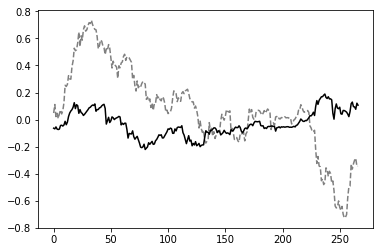

In [ ]:
plt.figure()
plt.plot(np.array(result_equal_vis).cumsum(), label = 'Benchmark', color = 'grey',ls = '--')
plt.plot(np.array(result_rl_vis).cumsum(), label = 'Deep RL portfolio', color = 'black',ls = '-')
plt.show()

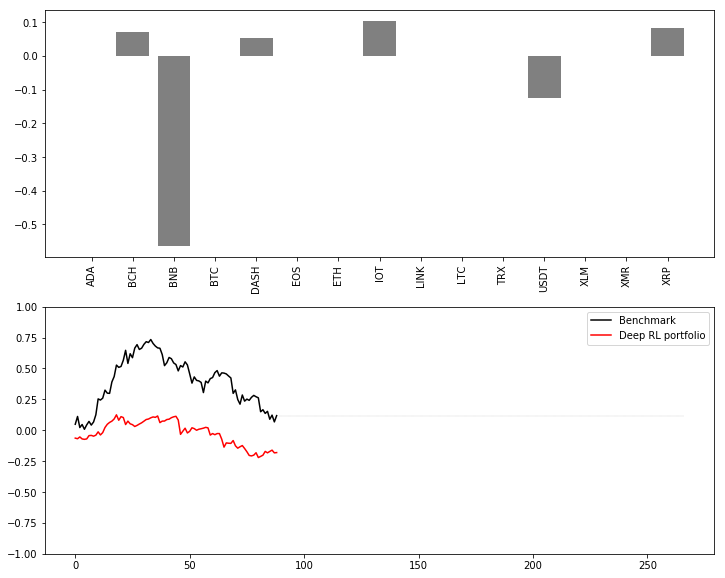

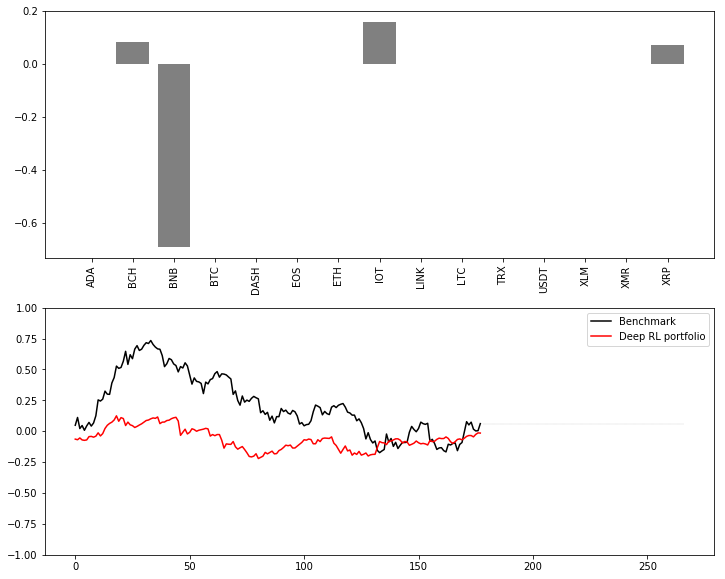

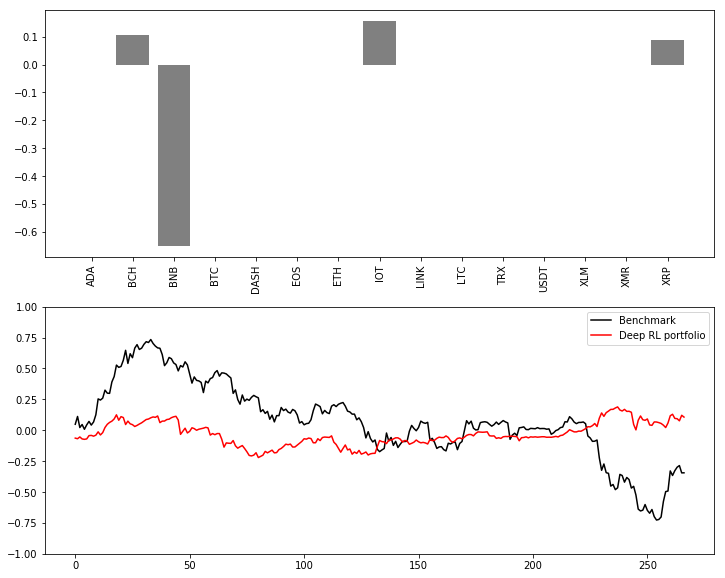

In [ ]:
#Plotting the data
import matplotlib
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='red')

N = len(np.array([item for sublist in result_equal for item in sublist]).cumsum())

for i in range(0, len(actions_rl)):
    current_range = np.arange(0, N)
    current_ts = np.zeros(N)
    current_ts2 = np.zeros(N)

    ts_benchmark = np.array([item for sublist in result_equal[:i+1] for item in sublist]).cumsum()
    ts_target = np.array([item for sublist in result_rl[:i+1] for item in sublist]).cumsum()

    t = len(ts_benchmark)
    current_ts[:t] = ts_benchmark
    current_ts2[:t] = ts_target

    current_ts[current_ts == 0] = ts_benchmark[-1]
    current_ts2[current_ts2 == 0] = ts_target[-1]

    plt.figure(figsize = (12, 10))

    plt.subplot(2, 1, 1)
    plt.bar(np.arange(N_ASSETS), actions_rl[i], color = 'grey')
    plt.xticks(np.arange(N_ASSETS), env.data.columns, rotation='vertical')

    plt.subplot(2, 1, 2)
    plt.colormaps = current_cmap
    plt.plot(current_range[:t], current_ts[:t], color = 'black', label = 'Benchmark')
    plt.plot(current_range[:t], current_ts2[:t], color = 'red', label = 'Deep RL portfolio')
    plt.plot(current_range[t:], current_ts[t:], ls = '--', lw = .1, color = 'black')
    plt.autoscale(False)
    plt.ylim([-1, 1])
    plt.legend()

In [ ]:
import statsmodels.api as sm
from statsmodels import regression
def sharpe(R):
    r = np.diff(R)
    sr = r.mean()/r.std() * np.sqrt(252)
    return sr

def print_stats(result, benchmark):

    sharpe_ratio = sharpe(np.array(result).cumsum())
    returns = np.mean(np.array(result))
    volatility = np.std(np.array(result))

    X = benchmark
    y = result
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(y, x).fit()
    alpha = model.params[0]
    beta = model.params[1]

    return np.round(np.array([returns, volatility, sharpe_ratio, alpha, beta]), 4).tolist()

In [ ]:
print('EQUAL', print_stats(result_equal_vis, result_equal_vis))
print('RL AGENT', print_stats(result_rl_vis, result_equal_vis))

EQUAL [-0.0013, 0.0468, -0.5016, 0.0, 1.0]
RL AGENT [0.0004, 0.0231, 0.4445, 0.0002, -0.1202]


RL portfolio has a higher return, higher sharp, lower volatility, higher alpha and negative correlation with the benchmark.

**Conclusion**

The idea in this case study was to go beyond classical Markowitz efficient frontier and directly learn the policy of changing the weights dynamically in the continuously
changing market.

We set up a standardized working environ‐
ment(“gym”) for cryptocurrencies to facilitate the training. The model starts to learn over a period of time, discovers the strategy
and starts to exploit it. we used the testing set to evaluate the model and found an
overall profit in the test set.

Overall, the framework provided in this case study can enable financial practitioners
to perform portfolio allocation and rebalancing with a very flexible and automated
approach and can prove to be immensely useful, specifically for robo-advisors
